In [16]:
import librosa
import glob
import numpy as np
import matplotlib.pyplot as plt

In [152]:
# Set the path
path ='/Users/junhyuckwoo/capstone/TestFile/Data/'
drone_path0 = path + 'phantom4/base/0feet_b.wav'
drone_path1 = path + 'phantom4/base/5feet_b.wav'
drone_path2 = path + 'phantom4/base/100feet_b.wav'
drone_path3 = path + 'phantom4/base/400feet_b.wav'
drone_qpath0 = path + 'phantom4/quiet/0feet_q.wav'
drone_qpath1 = path + 'phantom4/quiet/5feet_q.wav'
drone_qpath2 = path + 'phantom4/quiet/100feet_q.wav'
drone_qpath3 = path + 'phantom4/quiet/400feet_q.wav'

In [153]:
# Load data
raw_drone0, sr_drone0 = librosa.load(drone_path0, sr=44100)
raw_drone1, sr_drone1 = librosa.load(drone_path1, sr=44100)
raw_drone2, sr_drone2 = librosa.load(drone_path2, sr=44100)
raw_drone3, sr_drone3 = librosa.load(drone_path3, sr=44100)
raw_qdrone0, sr_drone3 = librosa.load(drone_qpath0, sr=44100)
raw_qdrone1, sr_drone3 = librosa.load(drone_qpath1, sr=44100)
raw_qdrone2, sr_drone3 = librosa.load(drone_qpath2, sr=44100)
raw_qdrone3, sr_drone3 = librosa.load(drone_qpath3, sr=44100)

In [183]:
# Split data as long as we want
length = 176400
length = 132300
drone0 = raw_drone0[:length]
drone1 = raw_drone1[:length]
drone2 = raw_drone2[:length]
drone3 = raw_drone3[:length]
qdrone0 = raw_qdrone0[:length]
qdrone1 = raw_qdrone1[:length]
qdrone2 = raw_qdrone2[:length]
qdrone3 = raw_qdrone3[:length]

# Check data length
print("drone0: ",len(drone0))
print("drone1: ",len(drone1))
print("drone2: ",len(drone2))
print("drone3: ",len(drone3))
print("q-drone0: ",len(qdrone0))
print("q-drone1: ",len(qdrone1))
print("q-drone2: ",len(qdrone2))
print("q-drone3: ",len(qdrone3))

drone0:  132300
drone1:  132300
drone2:  132300
drone3:  132300
q-drone0:  132300
q-drone1:  132300
q-drone2:  132300
q-drone3:  132300


In [184]:
# Calculate MFCC
mfcc_drone0 = librosa.feature.mfcc(drone0)
mfcc_drone1 = librosa.feature.mfcc(drone1)
mfcc_drone2 = librosa.feature.mfcc(drone2)
mfcc_drone3 = librosa.feature.mfcc(drone3)
mfcc_qdrone0 = librosa.feature.mfcc(qdrone0)
mfcc_qdrone1 = librosa.feature.mfcc(qdrone1)
mfcc_qdrone2 = librosa.feature.mfcc(qdrone2)
mfcc_qdrone3 = librosa.feature.mfcc(qdrone3)

In [185]:
# Input data
mfcc_drone_t0=mfcc_drone0.T
mfcc_drone_t1=mfcc_drone1.T
mfcc_drone_t2=mfcc_drone2.T
mfcc_drone_t3=mfcc_drone3.T
mfcc_qdrone_t0=mfcc_qdrone0.T
mfcc_qdrone_t1=mfcc_qdrone1.T
mfcc_qdrone_t2=mfcc_qdrone2.T
mfcc_qdrone_t3=mfcc_qdrone3.T

x = np.concatenate((mfcc_drone_t0, mfcc_qdrone_t0))
x = np.concatenate((x, mfcc_drone_t1))
x = np.concatenate((x, mfcc_qdrone_t1))
x = np.concatenate((x, mfcc_drone_t2))
x = np.concatenate((x, mfcc_qdrone_t2))
x = np.concatenate((x, mfcc_drone_t3))
x = np.concatenate((x, mfcc_qdrone_t3))


print("Drone0: ", mfcc_drone_t0.shape)
print("Drone1: ", mfcc_drone_t1.shape)
print("Drone2: ", mfcc_drone_t2.shape)
print("Drone3: ", mfcc_drone_t3.shape)
print("Drone0: ", mfcc_qdrone_t0.shape)
print("Drone1: ", mfcc_qdrone_t1.shape)
print("Drone2: ", mfcc_qdrone_t2.shape)
print("Drone3: ", mfcc_qdrone_t3.shape)
print("Input: ", x.shape)

Drone0:  (259, 20)
Drone1:  (259, 20)
Drone2:  (259, 20)
Drone3:  (259, 20)
Drone0:  (259, 20)
Drone1:  (259, 20)
Drone2:  (259, 20)
Drone3:  (259, 20)
Input:  (2072, 20)


In [186]:
# Label data
y1 = np.ones(mfcc_drone_t0.shape[0])
y2 = np.ones(mfcc_drone_t1.shape[0]) * 2
y3 = np.ones(mfcc_drone_t2.shape[0]) *3
y4 = np.ones(mfcc_drone_t3.shape[0])*4
qy1 = np.ones(mfcc_qdrone_t0.shape[0])
qy2 = np.ones(mfcc_qdrone_t1.shape[0]) * 2
qy3 = np.ones(mfcc_qdrone_t2.shape[0]) *3
qy4 = np.ones(mfcc_qdrone_t3.shape[0])*4

y = np.concatenate((y1,  qy1))
y = np.concatenate((y,  y2))
y = np.concatenate((y,  qy2))
y = np.concatenate((y,  y3))
y = np.concatenate((y,  qy3))
y = np.concatenate((y,  y4))
y = np.concatenate((y,  qy4))

print("L-Drone0: ", y1.shape)
print("L-Drone1: ", y2.shape)
print("L-Drone2: ", y3.shape)
print("L-Drone3: ", y4.shape)
print("L-Drone0: ", qy1.shape)
print("L-Drone1: ", qy2.shape)
print("L-Drone2: ", qy3.shape)
print("L-Drone3: ", qy4.shape)
print("y: ", y.shape)

L-Drone0:  (259,)
L-Drone1:  (259,)
L-Drone2:  (259,)
L-Drone3:  (259,)
L-Drone0:  (259,)
L-Drone1:  (259,)
L-Drone2:  (259,)
L-Drone3:  (259,)
y:  (2072,)


In [187]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

In [188]:
clf.fit(x, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [198]:
# Testing - Load data
path = '/Users/junhyuckwoo/capstone/TestFile/TestData/1/Test/*.wav'
files = glob.glob(path)
files.sort()

raw, sample_rate = librosa.load(files[0], sr=44100)
test = librosa.feature.mfcc(raw)
test = test.T
y = np.ones(test.shape[0])
num = 0
index = 1

for files_num in files[1:]:
    num = num + 1
    raw, sample_rate = librosa.load(files_num, sr=44100)
    mfcc = librosa.feature.mfcc(raw)
    test = np.concatenate((test,  mfcc.T))
    
    y_tmp = np.ones(mfcc.T.shape[0]) * index
    y = np.concatenate((y, y_tmp))
    if num%4 == 0:
        index = index + 1
    print(files_num + " is loaded")
    
print("Test input: ", test.shape)

/Users/junhyuckwoo/capstone/TestFile/TestData/1/Test/1_1.wav is loaded
/Users/junhyuckwoo/capstone/TestFile/TestData/1/Test/1_2.wav is loaded
/Users/junhyuckwoo/capstone/TestFile/TestData/1/Test/1_3.wav is loaded
/Users/junhyuckwoo/capstone/TestFile/TestData/1/Test/2.wav is loaded
/Users/junhyuckwoo/capstone/TestFile/TestData/1/Test/2_1.wav is loaded
/Users/junhyuckwoo/capstone/TestFile/TestData/1/Test/2_2.wav is loaded
/Users/junhyuckwoo/capstone/TestFile/TestData/1/Test/2_3.wav is loaded
/Users/junhyuckwoo/capstone/TestFile/TestData/1/Test/3.wav is loaded
/Users/junhyuckwoo/capstone/TestFile/TestData/1/Test/3_1.wav is loaded
/Users/junhyuckwoo/capstone/TestFile/TestData/1/Test/3_2.wav is loaded
/Users/junhyuckwoo/capstone/TestFile/TestData/1/Test/3_3.wav is loaded
/Users/junhyuckwoo/capstone/TestFile/TestData/1/Test/4.wav is loaded
/Users/junhyuckwoo/capstone/TestFile/TestData/1/Test/4_1.wav is loaded
/Users/junhyuckwoo/capstone/TestFile/TestData/1/Test/4_2.wav is loaded
/Users/junhy

In [199]:
y.shape

(1392,)

In [200]:
prediction = clf.predict(test)

In [201]:
 prediction.shape

(1392,)

In [202]:
print("테스트 세트의 정확도: {:.2f}".format(np.mean(prediction == y)))

테스트 세트의 정확도: 0.80


In [203]:
print(prediction)

[1. 1. 1. ... 4. 4. 4.]


In [204]:
print("테스트 세트의 정확도: {:.2f}".format(np.mean(prediction == y)))

테스트 세트의 정확도: 0.80


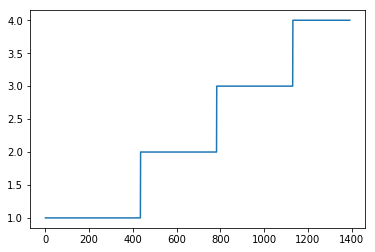

In [205]:
plt.plot(y)

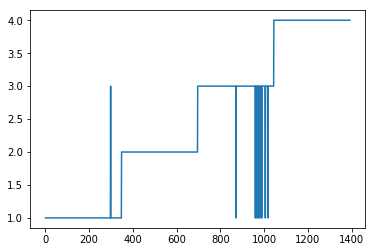

In [206]:
plt.plot(prediction)